<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ИМПОРТ БИБЛИОТЕК**

In [ ]:
# импорт библиотек 
import numpy as np
import pandas as pd
import random

#модель
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
#метрика качества
from sklearn.metrics import r2_score as r2

#визуализация
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from scipy.stats import mode


**ОСНОВНЫЕ** **ФУНКЦИИ**

In [ ]:
# Выводить R2 и строит графики для оценки качества модели
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
  
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [ ]:
#Печатает значения, частоту вхождения, кол-во пропущенных значений, IQR, выбросы и распределение числовой переменной 

def describe_numerical_var(series):
    p75 = series.quantile(0.75)
    p25 = series.quantile(0.25)
    IQR = p75 - p25
    series.hist()
    print(series.describe(), '\n')
    print('IQR = {}'.format(IQR))
    print('Outliers: {} and {}\n'.format(p25 - 1.5*IQR, p75 + 1.5*IQR))
    print('Column has {} ({}%) missing values\n'.
          format(series.isnull().sum(), series.isnull().sum()/len(series)))

In [296]:
#Печатает значения, частоту вхождения, кол-во пропущенных значений категориальной переменной

def describe_categorical_var(series):
    print(series.value_counts().head(10), '\n')
    print(series.value_counts(normalize=True).head(), '\n')
    print('Column has {} unique values'.format(series.nunique()))
    print('Column has {} ({}%) missing values\n'.
          format(series.isnull().sum(), series.isnull().sum()/len(series)))

**ИМПОРТ** **ДАННЫХ**

In [297]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving train.csv to train (2).csv


Saving test.csv to test (2).csv


In [298]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [299]:
df_test = pd.read_csv("test.csv")

In [300]:
print(f"Train:\t{df_train.shape[0]}\t and {df_train.shape[1]} features")
print(f'Test:\t{df_test.shape[0]}\t  and {df_test.shape[1]} features')

Train:	10000	 and 20 features
Test:	5000	  and 19 features


In [301]:
#проверяем чтобы тренировочный датасет был больше тестового на 1 параметр (цель)
df_train.shape[1] - 1 == df_test.shape[1]

True

In [302]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [303]:
df_train.isnull().sum()
#есть пропущенные значения

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [304]:
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)

**EDA**

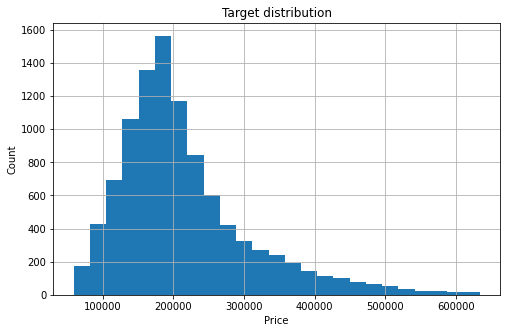

In [305]:
#целевая переменная
plt.figure(figsize=(8,5))
df_train['Price'].hist(bins = 25)

plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

In [306]:
#оценим описательные статистики количественных переменных
df_train.describe()


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [307]:
#выделим количественные переменные отдельно
df_train_num_features_float = df_train.select_dtypes( include = 'float64')
df_train_num_features_float.head()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1,Price
0,3.0,115.027311,NaN,10.0,10.0,0.075424,NaN,305018.871089
1,1.0,39.832524,23.169223,8.0,8.0,0.118537,1183.0,177734.553407
2,3.0,78.342215,47.671972,10.0,17.0,0.025609,240.0,282078.720850
3,1.0,40.409907,NaN,1.0,22.0,0.007122,NaN,168106.007630
4,2.0,64.285067,38.562517,9.0,16.0,0.282798,NaN,343995.102962


In [308]:
df_train_num_features_int = df_train.select_dtypes( include = 'int64')
df_train_num_features_int.head()

,Floor,HouseYear,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
0,4,2014,11,3097,0,0,0
1,7,1966,30,6207,1,1,0
2,2,1988,33,5261,0,3,1
3,10,1977,1,264,0,0,1
4,16,1972,33,8667,2,0,6


Analyzing 'Rooms' column
count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64 

IQR = 1.0
Outliers: -0.5 and 3.5

Column has 0 (0.0%) missing values

Analyzing 'Square' column
count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64 

IQR = 24.125744426186976
Outliers: 5.586264180189367 and 102.08924188493728

Column has 0 (0.0%) missing values

Analyzing 'LifeSquare' column
count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64 

IQR = 22.358970592121352
Outliers: -10.76862370672341 and 78.66725866176199

Column has 2113 (0.2113%) missing values

A

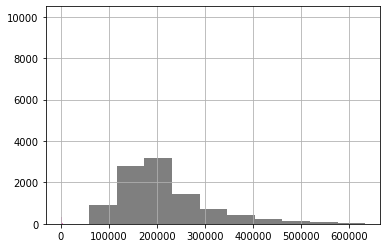

In [309]:
for column in df_train_num_features_float:
    print('Analyzing \'{}\' column'.format(column))
    describe_numerical_var(df_train[column])

Analyzing 'Floor' column
count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64 

IQR = 8.0
Outliers: -8.0 and 24.0

Column has 0 (0.0%) missing values

Analyzing 'HouseYear' column
count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64 

IQR = 27.0
Outliers: 1933.5 and 2041.5

Column has 0 (0.0%) missing values

Analyzing 'Social_1' column
count    10000.000000
mean        24.687000
std         17.532614
min          0.000000
25%          6.000000
50%         25.000000
75%         36.000000
max         74.000000
Name: Social_1, dtype: float64 

IQR = 30.0
Outliers: -39.0 and 81.0

Column has 0 (0.0%) missing values

Analyzing 'Social_2' column
count    10000.000000
mean      5352.157400
s

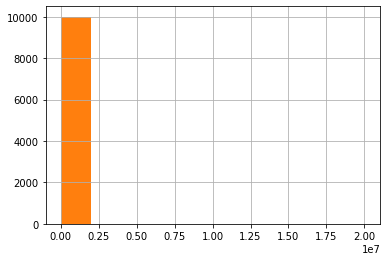

In [310]:
for column in df_train_num_features_int:
    print('Analyzing \'{}\' column'.format(column))
    describe_numerical_var(df_train[column])

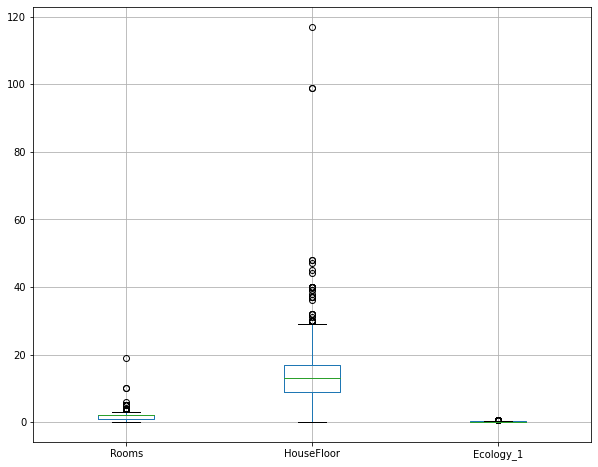

In [311]:
# оценим выбросы визуально
plt.figure(figsize=(10,8))
df_train_boxplot = df_train.boxplot(column = ['Rooms','HouseFloor','Ecology_1'])
df_train_boxplot.plot()
plt.show()

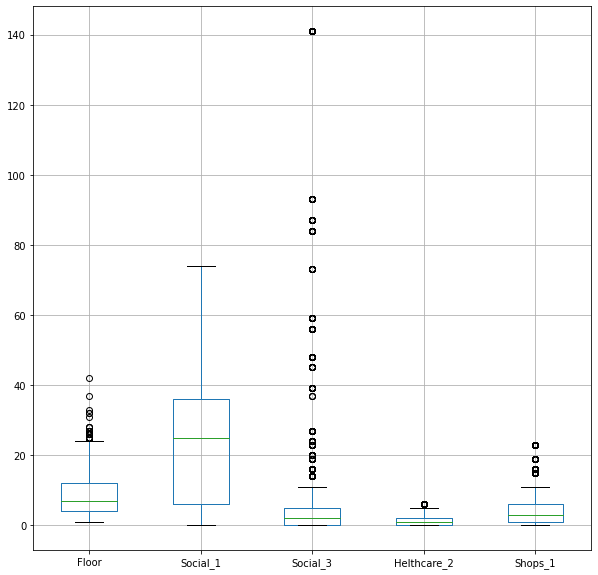

In [312]:
plt.figure(figsize=(10,10))
df_train_boxplot = df_train.boxplot(column = ['Floor','Social_1','Social_3','Helthcare_2','Shops_1'])
df_train_boxplot.plot()
plt.show()

In [313]:
#оценим категориальные данные
df_train_catg_features = df_train.select_dtypes('object')
df_train_catg_features.head()

,Id,DistrictId,Ecology_2,Ecology_3,Shops_2
0,11809,27,B,B,B
1,3013,22,B,B,B
2,8215,1,B,B,B
3,2352,1,B,B,B
4,13866,94,B,B,B


In [314]:
for column in df_train_catg_features:
    print('Analyzing \'{}\' column'.format(column))
    describe_categorical_var(df_train[column])

Analyzing 'Id' column
11809    1
2906     1
5039     1
6213     1
12319    1
15414    1
1249     1
16536    1
2459     1
1916     1
Name: Id, dtype: int64 

11809    0.0001
2906     0.0001
5039     0.0001
6213     0.0001
12319    0.0001
Name: Id, dtype: float64 

Column has 10000 unique values
Column has 0 (0.0%) missing values

Analyzing 'DistrictId' column
27    851
1     652
23    565
6     511
9     294
62    247
30    228
58    179
53    174
21    165
Name: DistrictId, dtype: int64 

27    0.0851
1     0.0652
23    0.0565
6     0.0511
9     0.0294
Name: DistrictId, dtype: float64 

Column has 205 unique values
Column has 0 (0.0%) missing values

Analyzing 'Ecology_2' column
B    9903
A      97
Name: Ecology_2, dtype: int64 

B    0.9903
A    0.0097
Name: Ecology_2, dtype: float64 

Column has 2 unique values
Column has 0 (0.0%) missing values

Analyzing 'Ecology_3' column
B    9725
A     275
Name: Ecology_3, dtype: int64 

B    0.9725
A    0.0275
Name: Ecology_3, dtype: float64 



Обработка выбросов

In [315]:
df_train['Rooms'].value_counts()
#есть 8 квартир с колиством комнат 0, и несколько квартир с количеством комнат  10 и 19

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [316]:
#создадм столбец, где будут хранится выбросы переменной Room
df_train['Rooms_outlier'] = 0
df_train.loc[(df_train['Rooms'] == 0) | (df_train['Rooms'] >= 6), 'Rooms_outlier'] = 1
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.102962,0


In [317]:
#заменим выбросы медианной
df_train.loc[df_train['Rooms'] == 0, 'Rooms'] = 1
df_train.loc[df_train['Rooms'] >= 6, 'Rooms'] = df_train['Rooms'].median()

In [318]:
df_train['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [319]:
df_train['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [320]:
df_train['KitchenSquare'].quantile(.975), df_train['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [321]:
#заменим выбросы медианой, значения выше quantile(.975) и значения меньше 3 заменим на 3
condition = (df_train['KitchenSquare'].isna()) \
             | (df_train['KitchenSquare'] > df_train['KitchenSquare'].quantile(.975))
        
df_train.loc[condition, 'KitchenSquare'] = df_train['KitchenSquare'].median()

df_train.loc[df_train['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [322]:
df_train['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

In [323]:
df_train['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
32.0        4
37.0        4
28.0        3
99.0        2
39.0        2
48.0        2
47.0        1
38.0        1
36.0        1
29.0        1
44.0        1
31.0        1
117.0       1
45.0        1
26.0        1
Name: HouseFloor, dtype: int64

In [324]:
df_train['HouseFloor_outlier'] = 0
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
df_train.loc[df_train['HouseFloor'] > 50, 'HouseFloor_outlier'] = 1

In [325]:
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()
df_train.loc[df_train['HouseFloor'] > 50, 'HouseFloor'] = df_train['HouseFloor'].median()

In [326]:
df_train['HouseFloor'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 36., 37., 38., 39., 40., 44., 45.,
       47., 48.])

In [327]:
df_train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [328]:
(df_train['Floor'] > df_train['HouseFloor']).sum()

1610

In [329]:
df_train.loc[df_train['Floor'] > df_train['HouseFloor'], 'HouseFloor_outlier'] = 1

In [330]:
df_train.loc[df_train['Floor'] > df_train['HouseFloor'], 'HouseFloor'] = df_train['Floor'] 

In [331]:
(df_train['Floor'] > df_train['HouseFloor']).sum()

0

In [332]:
df_train['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7721        2020
9122        2020
7955        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [333]:
df_train.loc[df_train['HouseYear'] > 2022, 'HouseYear'] = 2022

In [334]:
df_train['HouseYear'].sort_values().unique()

array([1910, 1912, 1914, 1916, 1917, 1918, 1919, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022])

In [335]:
current_year = datetime.now().year
df_train['HouseYear_outlier'] = 0
df_train.loc[df_train['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
df_train.loc[df_train['HouseYear'] > current_year, 'HouseYear'] = current_year

Обработка пропусков

In [336]:
df_train.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
HouseYear_outlier        0
dtype: int64

In [337]:
df_train['LifeSquare_nan'] = df_train['LifeSquare'].isna() * 1

condition = (df_train['LifeSquare'].isna()) \
             & (~df_train['Square'].isna()) \
             & (~df_train['KitchenSquare'].isna())
        
df_train.loc[condition, 'LifeSquare'] = df_train.loc[condition, 'Square'] \
                                            - df_train.loc[condition, 'KitchenSquare'] - 3

In [338]:
df_train.drop('Healthcare_1', axis=1, inplace=True)

In [339]:
df_train.isna().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
Rooms_outlier         0
HouseFloor_outlier    0
HouseYear_outlier     0
LifeSquare_nan        0
dtype: int64

In [340]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,1.887600,56.315775,40.734674,6.238200,8.526700,13.540000,1984.872800,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399,0.001200,0.182800,0.0,0.211300
std,0.811438,21.058732,77.610357,2.794717,5.241148,5.781292,18.417132,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865,0.034622,0.386522,0.0,0.408251
min,1.000000,1.136859,0.370619,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.0,0.000000
25%,1.000000,41.774881,25.285992,3.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942,0.000000,0.000000,0.0,0.000000
50%,2.000000,52.513310,35.527336,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879,0.000000,0.000000,0.0,0.000000
75%,2.000000,65.900625,48.706162,8.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171,0.000000,0.000000,0.0,0.000000
max,5.000000,641.065193,7480.592129,13.000000,42.000000,48.000000,2022.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,0.0,1.000000


In [341]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

Построение новых признаков

In [342]:
binary_to_numbers = {'A': 0, 'B': 1}

df_train['Ecology_2'] = df_train['Ecology_2'].replace(binary_to_numbers)
df_train['Ecology_3'] = df_train['Ecology_3'].replace(binary_to_numbers)
df_train['Shops_2'] = df_train['Shops_2'].replace(binary_to_numbers)

In [343]:
#создадим признак, который группипует количество квартиры по районам
district_size = df_train['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [344]:
df_train = df_train.merge(district_size, on='DistrictId', how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,0,0,1,305018.871089,0,0,0,1,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,1,0,1,177734.553407,0,0,0,0,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,3,1,1,282078.720850,0,0,0,0,652
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,0,0,1,1,168106.007630,0,0,0,1,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,2,0,6,1,343995.102962,0,0,0,0,89


In [345]:
(df_train['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [346]:
df_train['new_district'] = 0
df_train.loc[df_train['DistrictSize'].isna(), 'new_district'] = 1
        
df_train['DistrictSize'].fillna(5, inplace=True)
        

In [347]:
df_train['IsDistrictLarge'] = (df_train['DistrictSize'] > 100).astype(int)

In [348]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,1,305018.871089,0,0,0,1,851,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,1,177734.553407,0,0,0,0,78,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,1,282078.720850,0,0,0,0,652,0,1
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,1,1,168106.007630,0,0,0,1,652,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,6,1,343995.102962,0,0,0,0,89,0,0


In [349]:
#средняя цена по району и количеству комнат в квартире
med_price_by_district = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [350]:
df_train = df_train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,1,305018.871089,0,0,0,1,851,0,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,177734.553407,0,0,0,0,78,0,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,282078.720850,0,0,0,0,652,0,1,244005.272380
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,1,168106.007630,0,0,0,1,652,0,1,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,1,343995.102962,0,0,0,0,89,0,0,201584.441255


In [351]:
#кодируем возраст и этаж дома
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X

def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X

def year_to_cat(X):

    X['year_cat'] = 0
    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X

def year_to_cat_pandas(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X


In [352]:
bins = [0, 3, 5, 9, 15, df_train['Floor'].max()]
pd.cut(df_train['Floor'], bins=bins, labels=False)

0       1
1       2
2       0
3       3
4       4
       ..
9995    0
9996    3
9997    0
9998    0
9999    2
Name: Floor, Length: 10000, dtype: int64

In [353]:
bins = [0, 3, 5, 9, 15, df_train['Floor'].max()]
pd.cut(df_train['Floor'], bins=bins)

0         (3, 5]
1         (5, 9]
2         (0, 3]
3        (9, 15]
4       (15, 42]
          ...   
9995      (0, 3]
9996     (9, 15]
9997      (0, 3]
9998      (0, 3]
9999      (5, 9]
Name: Floor, Length: 10000, dtype: category
Categories (5, interval[int64, right]): [(0, 3] < (3, 5] < (5, 9] < (9, 15] < (15, 42]]

In [354]:
df_train = year_to_cat(df_train)
df_train = floor_to_cat(df_train)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,0,0,1,851,0,1,213530.788443,6,2
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,0,0,0,78,0,0,146032.829834,3,3
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,0,0,0,652,0,1,244005.272380,4,1
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,0,0,0,1,652,0,1,146735.671740,3,4
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,0,0,0,89,0,0,201584.441255,3,5


In [355]:
#средняя цена в зависимости от возраста дома и этажа
med_price_by_floor_year = df_train.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,1,1,380359.112959
1,1,2,321497.418777
2,1,3,368718.236013
3,1,4,400715.465642
4,2,1,467230.539057


In [356]:
df_train = df_train.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge,MedPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027311,102.027311,10.0,4,10.0,2014,0.075424,...,0,0,1,851,0,1,213530.788443,6,2,161246.069193
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,0,0,78,0,0,146032.829834,3,3,188098.168461
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,0,0,652,0,1,244005.272380,4,1,204940.082609
3,2352,1,1.0,40.409907,34.409907,3.0,10,22.0,1977,0.007122,...,0,0,1,652,0,1,146735.671740,3,4,185190.984473
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,0,0,89,0,0,201584.441255,3,5,181281.815896


In [357]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None

    def fit(self, X, y=None):
        
        X = X.copy()

        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}# DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

        # Target encoding
        ## District, Rooms
        df = X.copy()

        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
            
    def transform(self, X):
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)

        # DistrictId, IsDistrictLarge
           # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)

        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat

         # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
                    
        return X

    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

    


        
     


In [358]:
df_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'HouseYear_outlier',
 'LifeSquare_nan',
 'DistrictSize',
 'new_district',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [359]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize', 'new_district',
                     'IsDistrictLarge',  'MedPriceByDistrict', 'year_cat', 'floor_cat','MedPriceByFloorYear']
                    


target_name = 'Price'

**КОРРЕЛЯЦИЯ** **ПРИЗНАКОВ**

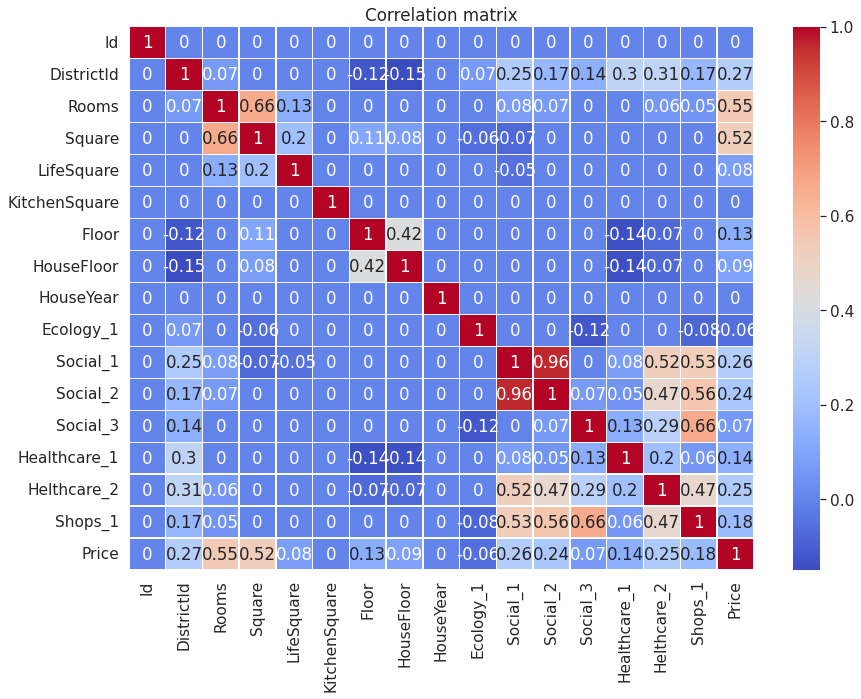

In [381]:
plt.figure(figsize = (14,10))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.05] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

#на целевую переменную самое большое значение оказывают переменные "Rooms", "Sqaure"

In [360]:
df_train= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
X = df_train.drop(columns=target_name)
y = df_train[target_name]

In [361]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [362]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
df_test= preprocessor.transform(df_test)

X_train.shape, X_valid.shape, df_test.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


((6700, 22), (3300, 22), (5000, 22))

In [363]:
X_train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'HouseYear_outlier',
 'LifeSquare_nan']

In [364]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
df_test = features_gen.transform(df_test)

X_train.shape, X_valid.shape, df_test.shape

((6700, 29), (3300, 29), (5000, 29))

In [365]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
df_test = df_test[feature_names + new_feature_names]

In [366]:
X_train.columns.tolist()

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'HouseYear_outlier',
 'LifeSquare_nan',
 'DistrictSize',
 'new_district',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [367]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0, 0)

**ПОСТРОЕНИЕ МОДЕЛИ**

In [368]:
rf_model = RandomForestRegressor(random_state=21, criterion='squared_error')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.966
Test R2:	0.707


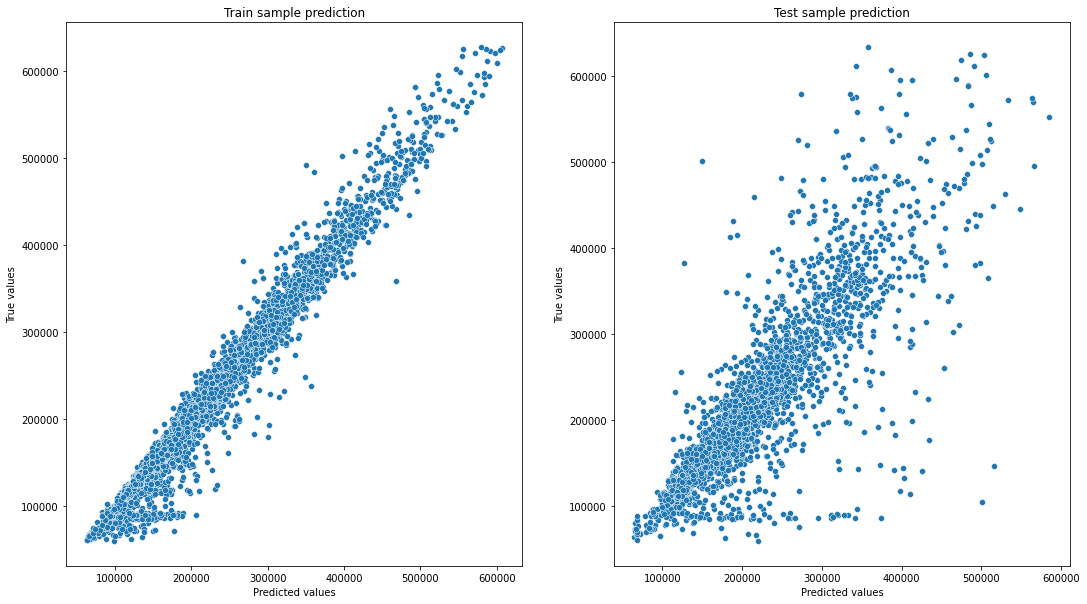

In [369]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [370]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

r2(y_test_preds, y_valid)

0.5922127989890861

In [371]:
r2(y_train_preds, y_train)

0.9609367020367939

In [372]:
#отмаштабируем данные
scaler = StandardScaler()

In [373]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names + new_feature_names)

X_valid_scaled = scaler.fit_transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=feature_names + new_feature_names)

In [383]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [386]:
y_train_preds = lr.predict(X_train)
y_train_preds

array([117658.38608713, 207360.96518657, 230620.59912828, ...,
       183916.33804372, 168059.81415513, 260366.71510806])

In [389]:
y_pred = lr.predict(X_valid)
y_pred

array([ 97414.61575852, 178439.1224636 , 292213.94008363, ...,
       175594.77216534, 200017.52152522, 224623.46361052])

In [384]:
from sklearn.metrics import mean_squared_error

In [390]:
print("Test RMSE = %.4f" % mean_squared_error(y_valid, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_preds, squared=False))

Test RMSE = 66044.1424
Train RMSE = 50833.9740


In [394]:
#попробуем данную модель на нормированных данных
rf_model = RandomForestRegressor(random_state=21, criterion='squared_error')
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=21)

In [395]:
y_train_preds = rf_model.predict(X_train_scaled)
y_test_preds = rf_model.predict(X_valid_scaled)

r2(y_test_preds, y_valid)
#r2 стал выше. Значит с нормированными данными модель работает лучше

0.6119125956015575

In [396]:
r2(y_train_preds, y_train)

0.9610042901972078

In [397]:
feature_importances = pd.DataFrame(zip(X_train_scaled.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
23,MedPriceByDistrict,6.496230e-01
1,Square,1.087910e-01
2,LifeSquare,3.402300e-02
6,HouseYear,2.191923e-02
5,HouseFloor,2.121185e-02
20,DistrictSize,2.048632e-02
12,Social_3,2.000421e-02
26,MedPriceByFloorYear,1.881180e-02
3,KitchenSquare,1.535625e-02
7,Ecology_1,1.534629e-02


Train R2:	0.698
Test R2:	0.697


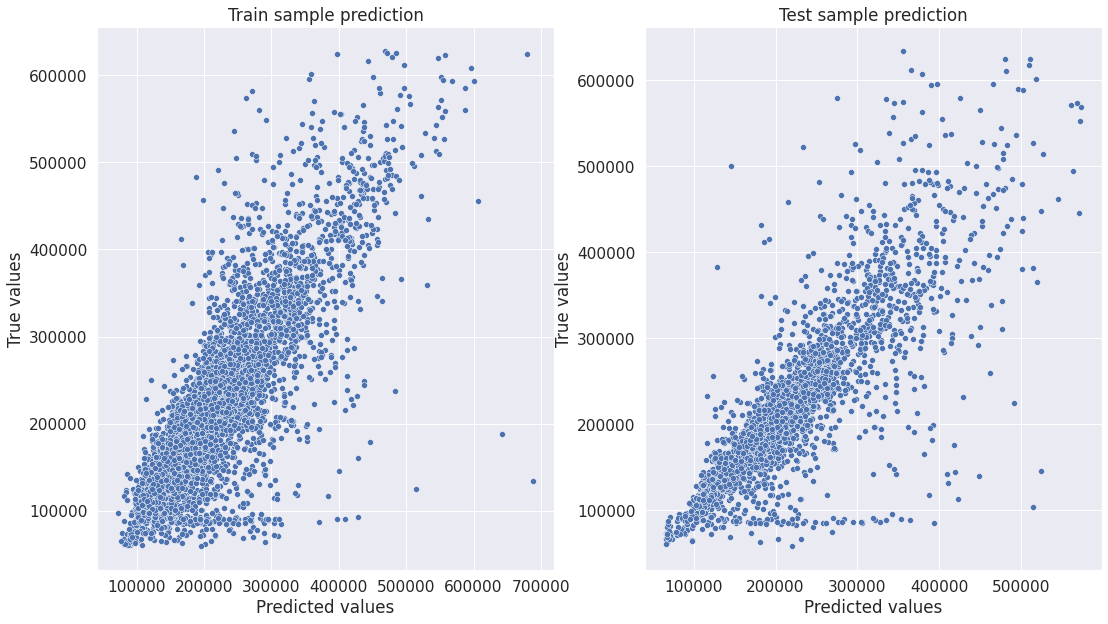

In [393]:
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [398]:
feature_importances = pd.DataFrame(zip(X_train_scaled.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
23,MedPriceByDistrict,6.496230e-01
1,Square,1.087910e-01
2,LifeSquare,3.402300e-02
6,HouseYear,2.191923e-02
5,HouseFloor,2.121185e-02
20,DistrictSize,2.048632e-02
12,Social_3,2.000421e-02
26,MedPriceByFloorYear,1.881180e-02
3,KitchenSquare,1.535625e-02
7,Ecology_1,1.534629e-02


In [400]:
from google.colab import files
uploaded = files.upload()


Saving sample_submission.csv to sample_submission (1).csv


In [401]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [402]:
predictions = rf_model.predict(df_test)
predictions

array([423127.53880844, 428807.4411426 , 425916.2878772 , ...,
       431694.30315553, 419602.61847477, 412636.88336886])

In [403]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,423127.538808
1,5925,428807.441143
2,960,425916.287877
3,3848,524440.195228
4,746,419268.952166


In [404]:
from google.colab import  drive
drive.mount('drive')

from google.colab import files
submit.to_csv('rt_submit.csv') 
files.download('rt_submit.csv')


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>